<a href="https://colab.research.google.com/github/Sammm21/ML/blob/main/Neural_Net_in_Numpy_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Less Classify Digits gigigigi B

We gonnu use MNIST and build a neural network from scrateroosies

In [ ]:
import numpy as np
import _pickle as cPickle
import gzip

In [ ]:
path = '/content/mnist.pkl.gz'

## Git and Load the Data BBBBBB

Create a DataLoader

In [ ]:
"""

mnist_Loader
'''''''''''''''''''''''''''

A library to load the MNIST image data. For details of the data structures that are returned, see the doc strings for
''load_data'' and ''Load_data_wrapper''. In practice, ''Load_data_wrapper'' is the function usually called by our network
code. 

"""

### Libraries needed
# standard libraries
import _pickle as cPickle
import gzip

# third party libraries
import numpy as np


def load_data():
  """Return the MNIST data as a tuple contaiing the training data, 
  the validation data, and the test data.

  The ''training_data'' is returned as a tuple with two entries. The
  first entry contains the actual training images. this is a s numpy
  ndarray with 50,000 entries. Each entry is, in turn, a numpy ndarray
  with 784 values, representing the 28 * 28 = 784 pixels in a single MNIST
  image

  The second entry in the ''training_data'' tuple is a numpy ndarray containing
  50,000 entries. Those entries are the labels i.e. the digit value (0-9) for the
  corresponding images contained in the first entry of the tuple. 

  The ''validation_data'' and ''test_data'' are similar to the training data and one
  and other except each contains only 10,000 images. 

  This is a nice data format, but for use in neural networks it's helpful to modify the
  format of the ''training_data'' a little. That's done in the wrapper function ''Load_data_wrapper'',
  see below.
  """

  f = gzip.open(path, 'rb')
  training_data, validation_data, test_data = cPickle.load(f, encoding='latin1')
  f.close()
  return (training_data, validation_data, test_data)


def load_data_wrapper():
    """Return a tuple contaiing ''(training_data, validation_data, test_data)''.
    Based on ''load_data'', but the format is more convenient for use in our 
    implementation of neural networks. 

    In particular, ''training_data'' is a list containing 50,000 2-tuples ''(x, y)''.
    In each case, ''x'' is a 784-dimensional numpy.ndarray containing the input image. ''y''
    is a 10-dimensional numpy.ndarray representing the unit vector corresponding to the 
    correct digit for ''x'' i.e. the labels.

    ''validation_data'' and ''test_data'' are lists containing 10,000 2-tuples ''(x, y)''. In each
    case, ''x'' is a 784-dimensional numpy.ndarray containing the input image, and ''y'' is the corresponding
    classification, i.e., the digit values (integers) corresponding to ''x''. 

    """
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)


def vectorized_result(j):
  """Return a 10-dimensional unit vector with a 1.0 in the jth position and zeroes elsewhere.
  We use this to convert a digit (0-9) into a corresponding desired output from the neural
  network.
  """
  e = np.zeros((10,1))
  e[j] = 1.0
  return e 

In [ ]:
training_data, validation_data, test_data = load_data_wrapper()

In [ ]:
len(training_data), len(validation_data), len(test_data)

(50000, 10000, 10000)

In [ ]:
def create_arrays(data): return np.asarray(data)

#### **See how we use list comprehension and indexing to create our bias and weight matrices**

In [ ]:
sizes = [2,3,1]
len(sizes), sizes[1:]

(3, [3, 1])

In [ ]:
test = [np.random.randn(y, 1) for y in sizes[1:]]
test

[array([[-0.29009362],
        [-0.33198507],
        [ 0.23086259]]), array([[0.04453417]])]

In [ ]:
sizes[:-1], sizes[1:]

([2, 3], [3, 1])

In [ ]:
test2 = [np.random.randn(y, x) for y, x in zip(sizes[:-1], sizes[1:])]
test2

[array([[ 0.16472237, -0.92472622,  1.42430331],
        [ 0.72424469, -0.00905271,  1.08457664]]), array([[-0.48480126],
        [ 0.6547891 ],
        [ 0.53775169]])]

## Make the network class

In [ ]:
class Network():   #create Network class 


    def __init__(self, sizes):   # when Network is called then __init__ will run
        self.num_layers = len(sizes)  # set the number of layers to be = to the length of sizes
        self.sizes = sizes # sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]] #list comprehension creates a list of arrays of biases shapes y*1 were y=1: of sizes list
        self.weights = [np.random.randn(y, x) for y, x in zip(sizes[:-1], sizes[1:])] #list comprehension creates a list of arrays of weights shapes y*x were
                                                                                      # the first set of weights will be shaped after sizes[:-1] and the second
                                                                                      # set of weights will be shaped after sizes[1:]

In [ ]:
net = Network([2, 3, 1])

### We need an activation function for our network as well!

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

### Feedforward 

We're define a feedforward function to be added later to our network class and all is does is implementing the equation below:

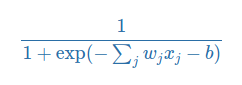

*The feedforward step works by multiplying each input by its corresponding weight and taking the sum then adding a bias term before passing it through the activation function* 

This for loop does exactly that by looping through the weight and bias vectors and dots weights with the input acitvations and add the bias term to the dotproduct before taking the sigmoid of the resulting weighted sum as seen in the equation above! 

In [ ]:
def feedforward(self, a):
  """Return the output of the network if 'a' is input."""
  for b, w in zip(self.biases, self.weights):
      a = sigmoid(np.dot(w,a)+b)
  return a

In [ ]:
for b, w in zip(test, test2):
  print(w)

[[ 0.16472237 -0.92472622  1.42430331]
 [ 0.72424469 -0.00905271  1.08457664]]
[[-0.48480126]
 [ 0.6547891 ]
 [ 0.53775169]]


### SGD

The main functionality we want out of our `Network` object is to be able to learn. To that end we'll use a `SGD` method which implements stochastic gradient descent:

In [ ]:
def SGD(self, training_data, epochs, mini_batch_size, eta, 
        test_data=None):

  """Train the neural network using mini-batch stochastic gradient
  descent. The "training_data" is a list of tuples "(x, y)" representing
  the training inputs and the desired outputs. The other non-optional 
  parameters are self-explanatory. If "test_data" is provided then the
  network will be evaluated against the test data after each epoch, and
  partial progress printed out. This is useful for tracking progress, but
  slows things down substantially."""
  
  if test_data: n_test = len(test_data)
  n = len(training_data)
  for j in range(epochs):
      random.shuffle(training_data) # randomly shuffle the training data
      mini_batches = [
          training_data[k:k+mini_batch_size] # partition the shuffled data into mini-batches of appropriate size
          for k in range(0 , n, mini_batch_size)] # start, end, step
      for mini_batch in mini_batches:
          self.update_mini_batch(mini_batch, eta) # update the networks weights and biases according to a single iteration of gradient descent
      if test_data:
          print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
      else:
          print("Epoch {0} complete".format(j))  

The `training_data` is a list of tuples `(x, y)` which represents the training inputs and corresponding desired outputs. `eta` is the learning rate. If the optional argument `test_data` is supplied, then the program will evaluate the network after each epoch of training, and print our partial progress. 

The code works as follows: In each epoch, it starts by randomly shuffling the training data, then it partitions the shuffled data into mini-batches of the appropriate size. This is an easy way of sampling randomly from the training data. Then for each `mini_batch` we apply a single step of gradient descent, which is done by `self.update_mini_batch(mini_batch, eta)`, which updates the networks weights and biases according to a single iteration of gradient descent, using just the training data in `mini_batch`, which leads us to the code for the `update_mini_batch` method:

In [ ]:
def update_mini_batch(self, mini_batch, eta):
  """Update the network's weights and biases by applying
  gradient descent using backpropagation to a single mini batch.
  The "mini_batch" is a list of tuples "(x, y)", and "eta" is 
  the learning rate.
  """
  nabla_b = [np.zeros(b.shape) for b in self.biases]
  nabla_w = [np.zeros(w.shape) for w in self.weights]
  for x, y in mini_batch:
      delta_nabla_b, delta_nabla_w = self.backprop(x, y)
      delta_nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
      nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
      nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
  self.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
  self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]


Most of the work is done by the line:

`delta_nabla_b, delta_nabla_w = self.backprop(x, y)`

This invokes backpropagation, which is a fast way of computing the gradient of the cost function, by applying the chain rule. So `update_mini_batch` wotks simply by computing the gradients for every training example in the `mini_batch`, and then updating `self.weights` and `self.biases` accordingly. 

### Backpropagation

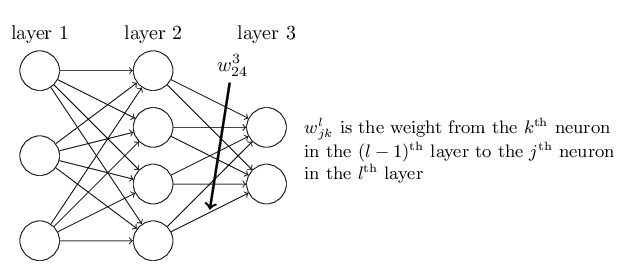

This notation is cumbersome at first, and it does take some work to master. But with a little effort you'll find the notation becomes easy and natural. One quirk of the notation is the ordering of the j and k indices. You might think that it makes more sense to use j to refer to the input neuron, and k to the output neuron, not vice versa, as is actually done. I'll explain the reason for this quirk below.
We use a similar notation for the network's biases and activations. Explicitly, we use blj for the bias of the jth neuron in the lth layer. And we use alj for the activation of the jth neuron in the lth layer. The following diagram shows examples of these notations in use:

We use a similar notation for the network's biases and activations. Explicitly, we use blj for the bias of the jth neuron in the lth layer. And we use alj for the activation of the jth neuron in the lth layer. The following diagram shows examples of these notations in use:

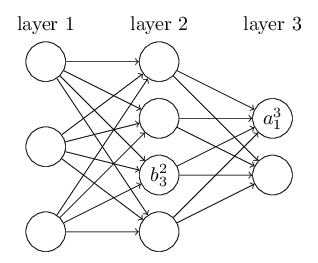

With these notations, the activation alj of the jth neuron in the lth layer is related to the activations in the (l−1)th layer by the equation 

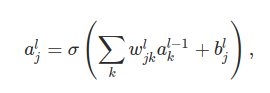

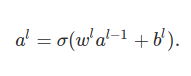

This expression gives us a much more global way of thinking about how the activations in one layer relate to activations in the previous layer: we just apply the weight matrix to the activations, then add the bias vector, and finally apply the σ function*.

*By the way, it's this expression that motivates the quirk in the wljk notation mentioned earlier. If we used j to index the input neuron, and k to index the output neuron, then we'd need to replace the weight matrix in Equation (25) by the transpose of the weight matrix. That's a small change, but annoying, and we'd lose the easy simplicity of saying (and thinking) "apply the weight matrix to the activations"

When using Equation (25) to compute al, we compute the intermediate quantity zl≡wlal−1+bl along the way. This quantity turns out to be useful enough to be worth naming: we call zl the weighted input to the neurons in layer l. We'll make considerable use of the weighted input zl later in the chapter. Equation (25) is sometimes written in terms of the weighted input, as al=σ(zl). It's also worth noting that zl has components zlj=∑kwljkal−1k+blj, that is, zlj is just the weighted input to the activation function for neuron j in layer l.

Heuristically we can view the gradients to be the measure of error in each neuron. 

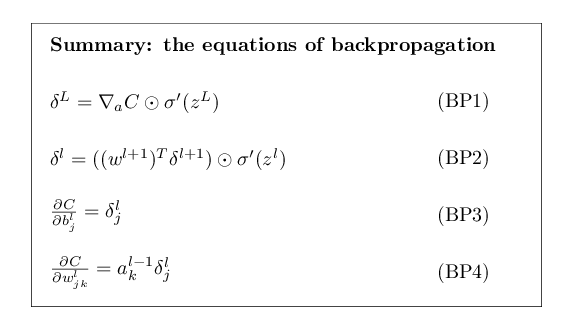

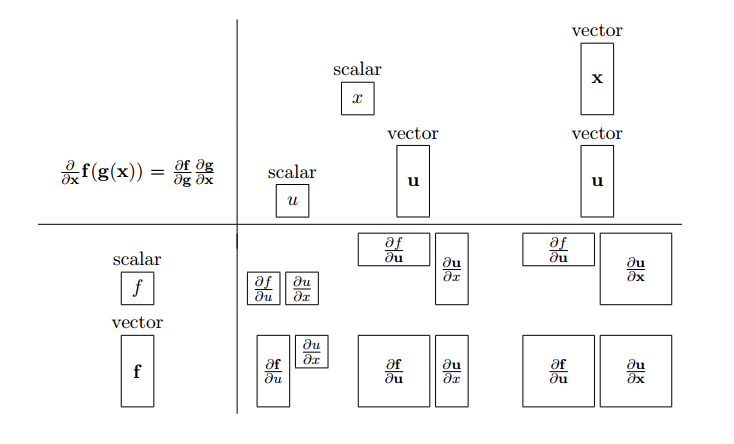

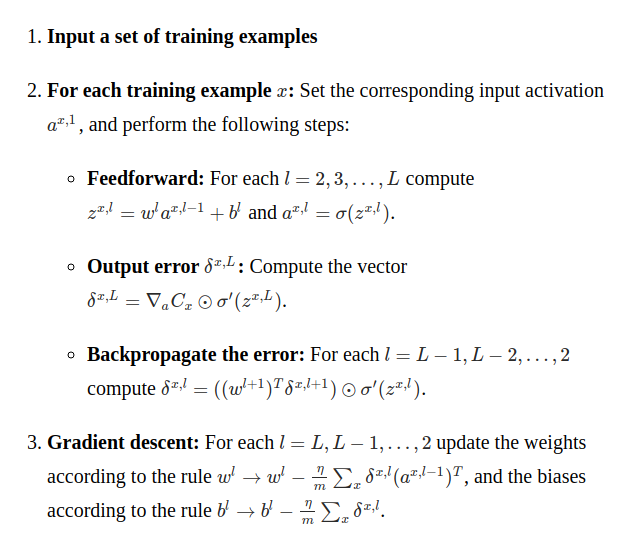

In [ ]:
def backprop(self, x, y):
    """

    """
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(self.biases, self.weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    # backward pass
    delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    # Note that the variable l in the loop below refers to:
    # l = 1 means the last layer of neurons, l = 2 is the second-last
    # layer, etc etc. We use this kind of numbering so we can take 
    # advantage of the fact that Python can use negative indices in lists:
    for l in range(2, self.num_layers):
        z = zs[-1]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-1+1].transpose(), delta) * sp
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-1-1].transpose())
    return (nabla_b, nabla_w)

In [ ]:
a = [1,2,3,4,5]
b = [a]
c = []
c.append(a)
c

[[1, 2, 3, 4, 5]]

In [ ]:
a[-1-1]

4

### Accuracy

In [ ]:
def evaluate(self, test_data):
    """
    """
    test_results = [(np.argmax(self.feedforward(x)), y)
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)

#### Derivatives

In [ ]:
def cost_derivative(self, output_activations, y):
    """
    """

In [ ]:
def simgoid_prime(z):

SyntaxError: ignored

### **The Whole Thing**

In [ ]:
"""

network.py

""""""
A module to implement the SGD learning algorithm for a feedforward neural network. 
Gradients are calculated using backprpagation.
"""

#### Libraries
# Standard library
import random

# 3rd party libraries
import numpy as np

class Network():   #create Network class 


    def __init__(self, sizes):   # when Network is called then __init__ will run
        """The list ''sizes'' contains the number of neurons in the respective layers
        of the network. For example, if the list was [2, 3, 1] then it would be a three-
        layer network, with the first layer contaiing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron. The biases and weights for the network
        are initalized randomly, using a Gaussian distribution with mean 0, and variance 1.
        Note that the first layer is assumed to be an input layer, and by convention we won't
        set any biases for those neurons, since biases are only ever used in computing the outputs
        from later layers."""
        self.num_layers = len(sizes)  # set the number of layers to be = to the length of sizes
        self.sizes = sizes # sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]] #list comprehension creates a list of arrays of biases shapes y*1 were y=1: of sizes list
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])] #list comprehension creates a list of arrays of weights shapes y*x were
                                                                # the first set of weights will be shaped after sizes[:-1] and the second
                                                                # set of weights will be shaped after sizes[1:]

    def feedforward(self, a):
        """Return the output of the network if ''a'' is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a)+b)
        return a

		

    def SGD(self, training_data, epochs, mini_batch_size, eta, 
        test_data=None):

        """Train the neural network using mini-batch stochastic gradient
        descent. The "training_data" is a list of tuples "(x, y)" representing
        the training inputs and the desired outputs. The other non-optional 
        parameters are self-explanatory. If "test_data" is provided then the
        network will be evaluated against the test data after each epoch, and
        partial progress printed out. This is useful for tracking progress, but
        slows things down substantially."""
  
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data) # randomly shuffle the training data
            mini_batches = [training_data[k:k+mini_batch_size] # partition the shuffled data into mini-batches of appropriate size
                                          for k in range(0 , n, mini_batch_size)] # start, end, step
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta) # update the networks weights and biases according to a single iteration of gradient descent
            if test_data:
                print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j)) 



    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta" is 
        the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y) # calculate the partial derivative of the cost with respect to the weights and biases
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]


    def backprop(self, x, y):
        """Return a tuple ''(nabla_b, nabla_w)'' representing the gradient for the cost
        function C_x. ''nabla_b'' and ''nabla_w'' are layer-by-layer lists of numpy arrays,
        similar to ''self.biases'' and ''self.weights''."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # This is del(aL)/del(zL)*del(C0)/del(aL)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below refers to:
        # l = 1 means the last layer of neurons, l = 2 is the second-last
        # layer, etc etc. We use this kind of numbering so we can take 
        # advantage of the fact that Python can use negative indices in lists:
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp # gradients from ahead layer * sigmoid_prime(z) of current layer????
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)



    def evaluate(self, test_data):
        """Return the number of test inputs for which the nueral network outputs the correct result.
        Note that the neural network's output is assumed to be the index of whicever neuron in the final
        layer has the highest acitvation.
        """
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)


    def cost_derivative(self, output_activations, y):
        """
        """
        return(output_activations-y)

### Misc functions

def sigmoid(z):
    """The sigmoid function"""
    return 1.0/(1.0 + np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function"""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
net = Network([784,30,10])

In [ ]:
net.SGD(training_data, 30,10,3.0, test_data)

In [ ]:
net = Network([784,100,10])
net.SGD(training_data, 30,10,3.0, test_data)

In [ ]:
net = Network([784,100,10])
net.SGD(training_data, 30,10,0.001, test_data)

In [ ]:
net = Network([784,100,10])
net.SGD(training_data, 30,10,100.0, test_data)

Fully matrix-based approach to backpropagation over a mini-batch Our implementation of stochastic gradient descent loops over training examples in a mini-batch. It's possible to modify the backpropagation algorithm so that it computes the gradients for all training examples in a mini-batch simultaneously. The idea is that instead of beginning with a single input vector, x, we can begin with a matrix X=[x1x2…xm] whose columns are the vectors in the mini-batch. We forward-propagate by multiplying by the weight matrices, adding a suitable matrix for the bias terms, and applying the sigmoid function everywhere. We backpropagate along similar lines. Explicitly write out pseudocode for this approach to the backpropagation algorithm. Modify network.py so that it uses this fully matrix-based approach. The advantage of this approach is that it takes full advantage of modern libraries for linear algebra. As a result it can be quite a bit faster than looping over the mini-batch. (On my laptop, for example, the speedup is about a factor of two when run on MNIST classification problems like those we considered in the last chapter.) In practice, all serious libraries for backpropagation use this fully matrix-based approach or some variant.

In [ ]:
    def SGD(self, training_data, epochs, mini_batch_size, eta, 
        test_data=None):

        """Train the neural network using mini-batch stochastic gradient
        descent. The "training_data" is a list of tuples "(x, y)" representing
        the training inputs and the desired outputs. The other non-optional 
        parameters are self-explanatory. If "test_data" is provided then the
        network will be evaluated against the test data after each epoch, and
        partial progress printed out. This is useful for tracking progress, but
        slows things down substantially."""
  
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data) # randomly shuffle the training data
            mini_batches = [training_data[k:k+mini_batch_size] # partition the shuffled data into mini-batches of appropriate size
                                          for k in range(0 , n, mini_batch_size)] # start, end, step
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta) # update the networks weights and biases according to a single iteration of gradient descent
            if test_data:
                print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j)) 


In [ ]:
    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        self.mini_batch_size = mini_batch_size  # to be used in other functions
        n = len(training_data)
        start = time.time()  # begin timer
        for j in range(epochs):
            random.shuffle(training_data)  # randomly shuffle the training data
            mini_batches = [training_data[k:k+mini_batch_size] # partition the shuffled data into mini-batches of appropriate size
                            for k in range(0, n, mini_batch_size)] # start, end, step
            mini_batches_X, mini_batches_Y = [], [] 
            for batch in mini_batches:
              # Create Matrices for X and Y in each mini batch
                mini_batches_X.append(np.column_stack(tuple([batch[k][0]  # Stack 1-D arrays as columns into a 2-D array.
                    for k in range(mini_batch_size)])))
                mini_batches_Y.append(np.column_stack(tuple([batch[k][1]
                    for k in range(mini_batch_size)])))
            for X, Y in zip(mini_batches_X, mini_batches_Y):
                self.update_mini_batch(X, Y, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}, elapsed time: {3:.2f}s".format(
                    j, self.evaluate(test_data), n_test, time.time()-start))
            else:
                print("Epoch {0} complete, elapsed time: {1:.2f}s".format(
                    j, time.time()-start))



In [ ]:
mini_batch_size = 10
n = len(training_data)
mini_batches = [training_data[k:k+mini_batch_size] # partition the shuffled data into mini-batches of appropriate size
                            for k in range(0, n, mini_batch_size)] # start, end, step


In [ ]:
len(mini_batches)

In [ ]:
mini_batches_X, mini_batches_Y = [], [] 
for batch in mini_batches:
              # Create Matrices for X and Y in each mini batch
                mini_batches_X.append(np.column_stack(tuple([batch[k][0]  # Stack 1-D arrays as columns into a 2-D array.
                    for k in range(mini_batch_size)])))
                mini_batches_Y.append(np.column_stack(tuple([batch[k][1]
                    for k in range(mini_batch_size)])))

In [ ]:
len(mini_batches_X), len(mini_batches_Y)

In [ ]:
mini_batches = [training_data[k:k+mini_batch_size] for k in range(0 , n, mini_batch_size)]

In [ ]:
for mini_batch in mini_batches:
  test = len(mini_batch)

In [ ]:
test

So the difference between doing SGD in matrix for vs vector form is that with matrix form we are using all 5000 inputs to calcualte the gradients for all those examples update our weights while in the vectorized version we are looping through our 5000 mini-batches of 10 examples and doing the computations and updates to the weights and biased 10 at a time instead of 5000 at one time. 

In [ ]:
 
"""
network_matrix.py
~~~~~~~~~~
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random
import time

# Third-party libraries
import numpy as np

class Network2():   #create Network class 


    def __init__(self, sizes):   # when Network is called then __init__ will run
        """The list ''sizes'' contains the number of neurons in the respective layers
        of the network. For example, if the list was [2, 3, 1] then it would be a three-
        layer network, with the first layer contaiing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron. The biases and weights for the network
        are initalized randomly, using a Gaussian distribution with mean 0, and variance 1.
        Note that the first layer is assumed to be an input layer, and by convention we won't
        set any biases for those neurons, since biases are only ever used in computing the outputs
        from later layers."""
        self.num_layers = len(sizes)  # set the number of layers to be = to the length of sizes
        self.sizes = sizes # sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]] #list comprehension creates a list of arrays of biases shapes y*1 were y=1: of sizes list
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])] #list comprehension creates a list of arrays of weights shapes y*x were
                                                                # the first set of weights will be shaped after sizes[:-1] and the second
                                                                # set of weights will be shaped after sizes[1:]

    def feedforward(self, a):
        """Return the output of the network if ''a'' is input."""
        for b, w in zip(self.biases, self.weights): #loop through the biases and weights
            a = sigmoid(np.dot(w,a)+b) # perform the linear operation
        return a


    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        self.mini_batch_size = mini_batch_size  # to be used in other functions
        n = len(training_data)
        start = time.time()  # begin timer
        for j in range(epochs):  # for every epoch
            random.shuffle(training_data) # randomly shuffle the data
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)] # create a minibatch for all the training data from 0-n, with a step size of the mini_batch_size
            mini_batches_X, mini_batches_Y = [], [] # create empty list for the matrices of input vectors X and Y
            for batch in mini_batches:
                mini_batches_X.append(np.column_stack(tuple([batch[k][0]
                    for k in range(mini_batch_size)])))
                mini_batches_Y.append(np.column_stack(tuple([batch[k][1]
                    for k in range(mini_batch_size)])))
            for X, Y in zip(mini_batches_X, mini_batches_Y):
                self.update_mini_batch(X, Y, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}, elapsed time: {3:.2f}s".format(
                    j, self.evaluate(test_data), n_test, time.time()-start))
            else:
                print("Epoch {0} complete, elapsed time: {1:.2f}s".format(
                    j, time.time()-start))



  
    def update_mini_batch(self, X, Y, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        ``eta`` is the learning rate."""
        nabla_b, nabla_w = self.backprop(X, Y)
        sum_nabla_b = [np.sum(nb, axis=1).reshape((nb.shape[0],1)) for nb in nabla_b]
        self.weights = [w-(eta/self.mini_batch_size)*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/self.mini_batch_size)*nb
                       for b, nb in zip(self.biases, sum_nabla_b)]

    def backprop(self, X, Y):
        """Return a tuple ``(nabla_B, nabla_W)`` representing the
        gradient for the cost function C_x.  ``nabla_B`` and
        ``nabla_W`` are layer-by-layer lists of numpy arrays of dimension 2,
        similar to ``self.biases`` and ``self.weights`` but nabla_B's columns
        are repeated over the training examples."""
        nabla_B = [np.tile(np.zeros(b.shape), (1, self.mini_batch_size))
                for b in self.biases]
        nabla_W = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = X
        activations = [X] # list to store all the activations, layer by layer
        zs = [] # list to store all the z matrices, layer by layer
        for b, w in zip(self.biases, self.weights):
            B = np.tile(b, (1,self.mini_batch_size))  # repeat column b for each training example
            Z = np.dot(w, activation)+B
            zs.append(Z)
            activation = sigmoid(Z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], Y) * \
            sigmoid_prime(zs[-1])
        nabla_B[-1] = delta
        nabla_W[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            Z = zs[-l]
            sp = sigmoid_prime(Z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_B[-l] = delta
            nabla_W[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_B, nabla_W)



    def evaluate(self, test_data):
        """Return the number of test inputs for which the nueral network outputs the correct result.
        Note that the neural network's output is assumed to be the index of whicever neuron in the final
        layer has the highest acitvation.
        """
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)


    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return(output_activations-y)

### Misc functions

def sigmoid(z):
    """The sigmoid function"""
    return 1.0/(1.0 + np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function"""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
net = Network2([784,100,10])
net.SGD(training_data, 30,10,3.0, test_data)

In [ ]:
 
"""
network_matrix.py
~~~~~~~~~~
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random
import time

# Third-party libraries
import numpy as np

class Network22(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a    

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        self.mini_batch_size = mini_batch_size  # to be used in other functions
        n = len(training_data)
        start = time.time()  # begin timer
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            mini_batches_X, mini_batches_Y = [], []
            for batch in mini_batches:
                mini_batches_X.append(np.column_stack(tuple([batch[k][0]
                    for k in range(mini_batch_size)])))
                mini_batches_Y.append(np.column_stack(tuple([batch[k][1]
                    for k in range(mini_batch_size)])))
            for X, Y in zip(mini_batches_X, mini_batches_Y):
                self.update_mini_batch(X, Y, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}, elapsed time: {3:.2f}s".format(
                    j, self.evaluate(test_data), n_test, time.time()-start))
            else:
                print("Epoch {0} complete, elapsed time: {1:.2f}s".format(
                    j, time.time()-start))

    def update_mini_batch(self, X, Y, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        ``eta`` is the learning rate."""
        nabla_b, nabla_w = self.backprop(X, Y)
        sum_nabla_b = [np.sum(nb, axis=1).reshape((nb.shape[0],1)) for nb in nabla_b]
        self.weights = [w-(eta/self.mini_batch_size)*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/self.mini_batch_size)*nb
                       for b, nb in zip(self.biases, sum_nabla_b)]


    def backprop(self, X, Y):
        """Return a tuple ``(nabla_B, nabla_W)`` representing the
        gradient for the cost function C_x.  ``nabla_B`` and
        ``nabla_W`` are layer-by-layer lists of numpy arrays of dimension 2,
        similar to ``self.biases`` and ``self.weights`` but nabla_B's columns
        are repeated over the training examples."""
        nabla_B = [np.tile(np.zeros(b.shape), (1, self.mini_batch_size))
                for b in self.biases]
        nabla_W = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = X
        activations = [X] # list to store all the activations, layer by layer
        zs = [] # list to store all the z matrices, layer by layer
        for b, w in zip(self.biases, self.weights):
            B = np.tile(b, (1,self.mini_batch_size))  # repeat column b for each training example
            Z = np.dot(w, activation)+B
            zs.append(Z)
            activation = sigmoid(Z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], Y) * \
            sigmoid_prime(zs[-1])
        nabla_B[-1] = delta
        nabla_W[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            Z = zs[-l]
            sp = sigmoid_prime(Z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_B[-l] = delta
            nabla_W[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_B, nabla_W)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the matrix of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Network 2.0


Time to code a network with a cross entropy cost function which will prevent outputs from saturating and learning to slow down. Also we want to add a regularization term this will prevent overfitting. Finally we will initialize our weights differently which will narrow the distribution of the activations and prevent the neurons from saturating and slowing down learning. 

In [ ]:
"""network_improved.py

-----------------------

An improved version of network.py, implementing the stochastic gradient descen learning algorithm for 
a feedforward neural network. Improvements include the addiction of the cross-entropy loss function,
regularizations, and better initalization of the network weights. 

"""

#### Libraries
# Standard Library
import json
import random
import sys

# Third-party libraries
import numpy as np

#### Define the quadratic and cross-entropy cost function 
#### we will define both so that we can use both for comparision

class QuadraticCost():

    @staticmethod
    def fn(a, y):
        """Return the cost asosciated with an output ''a'' and desired output ''y''

        """

        return 0.5*np.linalg.norm(a-y)**2 #Matrix or vector norm of (a-y)**2

    @staticmethod
    def delta(z, a, y):
        """Return the error delta from the output layer."""
        return (a-y) * sigmoid_prime(z)


class CrossEntropyCost():

    @staticmethod
    def fn(a, y):
        """Return the cost associated with an output ''a'' and desired output ''y''.
        Note that np.nan_to_num is used to ensure numerical stability. In particular,
        if both ''a'' and ''y'' have a 1.0 in the same slot, then the expression 
        (1-y)*np.log(1-a) returns nan. The np.nan_to_num ensures that is converted to 
        the correct value (0.0)."""

        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))


    @staticmethod
    def delta(z, a, y):
      """Return the error delta from the output layer. Note that the parameter ''z''
      is not used by the method. It is included in the method's parameters in order to make 
      the inteface consistent with the delta method for other cost classes only."""

      return (a-y)


####Main Network class

class Network():

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list ''sizes'' contains the number of neurons in the respective layers
        of the network. For example, if the list was [2, 3, 1] then it would be a three-
        layer network, with the first layer contaiing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron. The biases and weights for the network are initalized
        randomly, using ''self.default_weight_initalizer'' (see docstring for that method)"""

          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost

      
      def default_weight_initializer(self):
          """Initalize each weight using a Gaussian distribution with mean 0 and standard
          deviation 1 over the square root of the number of weights connecting to the same 
          neuron. Initalize the biases using a Gaussian distribution with mean 0 and standard
          deviation 1.

          Note that the first layer is assumed  to be an input layer, and by convention we won't
          set any biases for those neurons, since biases are only ever used in computing the outputs 
          from later layers."""

          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x)
                          for x, y in zip(self.sizes[:-1], self.sizes[1:])]

      
      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0 and standard deviation
          1. Initalize the biases using a Gaussian distribution with mean 0 and standard deviation 1.

          Note that the first layer is assumed to be an input layer, and by convention we won't set any
          biases for those neurons, since biases are only ever used in computing the outputs from layer
          layers.

          This weight and bias initializer uses the same approach as in Chapter 1, and is included for purposes
          of comparision. It will usually be better to use the default weight initializer instead."""

          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)
                          for x, y in zip(self.sizes[:-1], self.sizes[1:])]

      def feedforward(self, a):
          """Return the output of the network if ''a'' is input."""
          for b, w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w, a) + b)
          return a

      
      def SGD(self, training_data, epochs, mini_batch_size, eta, 
              lmbda= 0.0,
              evaluation_data = None,
              monitor_evaluation_cost = False,
              monitor_evaluation_accuracy = False,
              monitor_training_cost = False,
              monitor_training_accuracy = False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The ``training_data`` is a list of tuples ``(x, y)``
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the
          regularization parameter ``lmbda``.  The method also accepts
          ``evaluation_data``, usually either the validation or test
          data.  We can monitor the cost and accuracy on either the
          evaluation data or the training data, by setting the
          appropriate flags.  The method returns a tuple containing four
          lists: the (per-epoch) costs on the evaluation data, the
          accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data.  All values are
          evaluated at the end of each training epoch.  So, for example,
          if we train for 30 epochs, then the first element of the tuple
          will be a 30-element list containing the cost on the
          evaluation data at the end of each epoch. Note that the lists
          are empty if the corresponding flag is not set."""
         
          if evaluation_data: n_data = len(evaluation_data)
          n = len(training_data)
          evaluation_cost, evaluation_accuracy = [], []
          training_cost, training_accuracy = [], []
          for j in range(epochs):
              random.shuffle(training_data)
              mini_batches = [training_data[k:k+mini_batch_size]
                              for k in range(0, n, mini_batch_size)]
              for mini_batch in mini_batches:
                  self.update_mini_batch(
                      mini_batch, eta, lmbda, len(training_data))
              print("Epoch %s training complete" % j)
              if monitor_training_cost:
                cost = self.total_cost(training_data, lmbda)
                training_cost.append(cost)
                print("Cost on training data: {}".format(cost))
              if monitor_training_accuracy:
                accuracy = self.accuracy(training_data, convert = True)
                training_accuracy.append(accuracy)
                print("Accuracy on training data: {} / {}".format(accuracy, n))
              if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data, lmbda, convert = True)
                evaluation_cost.append(cost)
                print("Cost on evaluation data: {}".format(cost))
              if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print("Accuracy on evaluation data: {} / {}".format(
                    self.accuracy(evaluation_data), n_data))
          
              print
        
          return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy
                  

      def update_mini_batch(self, mini_batch, eta, lmbda, n):

        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta" is 
        the learning rate, ''lmdaää is the regularization parameter, and 
        ''n'' is the total size of the training data set."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y) # calculate the partial derivative of the cost with respect to the weights and biases
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [(1-eta*(lmbda/n))*w - (eta / len(mini_batch)) * nw
                         for w, nw in zip(self.weights, nabla_w)] #scale weights by weight decay
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]


      def backprop(self, x, y):
        """Return a tuple ''(nabla_b, nabla_w)'' representing the gradient for the cost
        function C_x. ''nabla_b'' and ''nabla_w'' are layer-by-layer lists of numpy arrays,
        similar to ''self.biases'' and ''self.weights''."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = (self.cost).delta(zs[-1], activations[-1], y) * sigmoid_prime(zs[-1]) # This is del(aL)/del(zL)*del(C0)/del(aL)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below refers to:
        # l = 1 means the last layer of neurons, l = 2 is the second-last
        # layer, etc etc. We use this kind of numbering so we can take 
        # advantage of the fact that Python can use negative indices in lists:
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp # gradients from ahead layer * sigmoid_prime(z) of current layer????
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)



      def accuracy(self, data, convert=False):
        """Return the number of test inputs for which the nueral network outputs the correct result.
        Note that the neural network's output is assumed to be the index of whicever neuron in the final
        layer has the highest acitvation.

        The flag ``convert`` should be set to False if the data set is
        validation or test data (the usual case), and to True if the
        data set is the training data. The need for this flag arises
        due to differences in the way the results ``y`` are
        represented in the different data sets.  In particular, it
        flags whether we need to convert between the different
        representations.  It may seem strange to use different
        representations for the different data sets.  Why not use the
        same representation for all three data sets?  It's done for
        efficiency reasons -- the program usually evaluates the cost
        on the training data and the accuracy on other data sets.
        These are different types of computations, and using different
        representations speeds things up.  More details on the
        representations can be found in
        mnist_loader.load_data_wrapper.

        """
        if convert:
            results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                      for (x, y) in data]

        else:
            results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in data]

        return sum(int(x == y) for (x, y) in results)

  



      def total_cost(self, data, lmbda, convert=False):
        """Return the total cost for the data set ``data``.  The flag
        ``convert`` should be set to False if the data set is the
        training data (the usual case), and to True if the data set is
        the validation or test data.  See comments on the similar (but
        reversed) convention for the ``accuracy`` method, above.
        """
        cost = 0.0
        for x, y in data:
            a = self.feedforward(x)
            if convert: y = vectorized_result(y)
            cost += self.cost.fn(a, y)/len(data)
        cost += 0.5*(lmbda/len(data))*sum(
            np.linalg.norm(w)**2 for w in self.weights)
        return cost

      def save(self, filename):
        """Save the neural network to the file ``filename``."""
        data = {"sizes": self.sizes,
                "weights": [w.tolist() for w in self.weights],
                "biases": [b.tolist() for b in self.biases],
                "cost": str(self.cost.__name__)}
        f = open(filename, "w")
        json.dump(data, f)
        f.close()

#### Loading a Network
def load(filename):
    """Load a neural network from the file ``filename``.  Returns an
    instance of Network.

    """
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net

#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position
    and zeroes elsewhere.  This is used to convert a digit (0...9)
    into a corresponding desired output from the neural network.

    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


### Misc functions

def sigmoid(z):
    """The sigmoid function"""
    return 1.0/(1.0 + np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function"""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
net = Network([784,30,10], cost=CrossEntropyCost)
net.SGD(training_data, 30,10,0.5,
        lmbda= 5.0,
        evaluation_data = validation_data,
        monitor_evaluation_accuracy = True,
        monitor_evaluation_cost = True,
        monitor_training_accuracy = True,
        monitor_training_cost = True)

Epoch 0 training complete
Cost on training data: 0.6942914416734808
Accuracy on training data: 45855 / 50000
Cost on evaluation data: 0.7304635858177172
Accuracy on evaluation data: 9244 / 10000
Epoch 1 training complete
Cost on training data: 0.60844759197216
Accuracy on training data: 46519 / 50000
Cost on evaluation data: 0.6700825788380427
Accuracy on evaluation data: 9323 / 10000


KeyboardInterrupt: ignored

In [ ]:
net = Network([784, 30, 10], cost=CrossEntropyCost) 
net.large_weight_initializer()
test_accuracy, training_cost=net.SGD(training_data[:1000], 400, 10, 0.5, evaluation_data=test_data,
monitor_evaluation_accuracy=True, monitor_training_cost=True)

Epoch 0 training complete
Cost on training data: 4.9977134640253995
Accuracy on evaluation data: 1818 / 10000
Epoch 1 training complete
Cost on training data: 4.914487412401815
Accuracy on evaluation data: 2162 / 10000
Epoch 2 training complete
Cost on training data: 4.713029207329128
Accuracy on evaluation data: 2465 / 10000
Epoch 3 training complete
Cost on training data: 4.43610578642631
Accuracy on evaluation data: 2883 / 10000
Epoch 4 training complete
Cost on training data: 4.2162288652846645
Accuracy on evaluation data: 3312 / 10000
Epoch 5 training complete
Cost on training data: 4.017133513164101
Accuracy on evaluation data: 3577 / 10000
Epoch 6 training complete
Cost on training data: 3.7920114304274803
Accuracy on evaluation data: 3913 / 10000
Epoch 7 training complete
Cost on training data: 3.6631122198020507
Accuracy on evaluation data: 4147 / 10000
Epoch 8 training complete
Cost on training data: 3.5586752347280735
Accuracy on evaluation data: 4324 / 10000
Epoch 9 trainin

ValueError: ignored

# Regularization

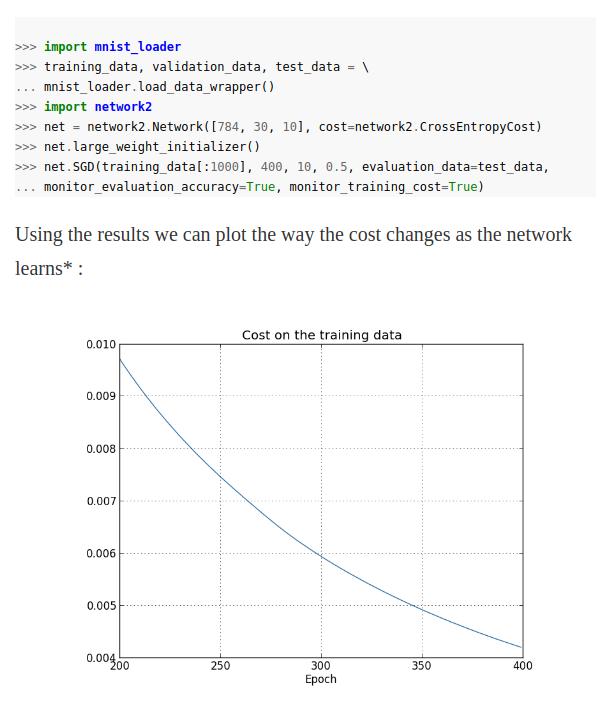

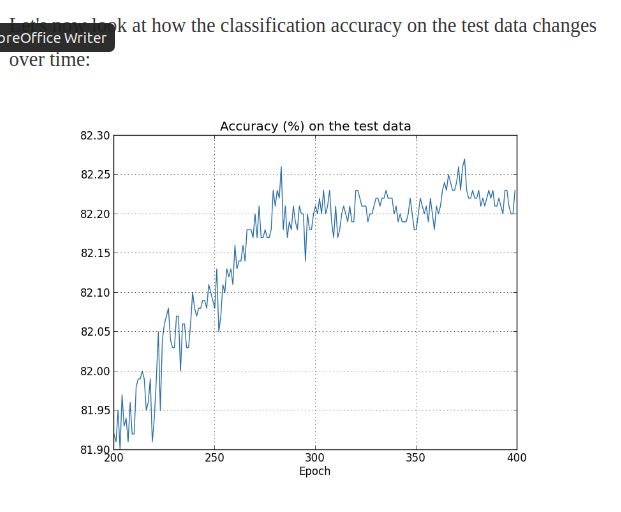

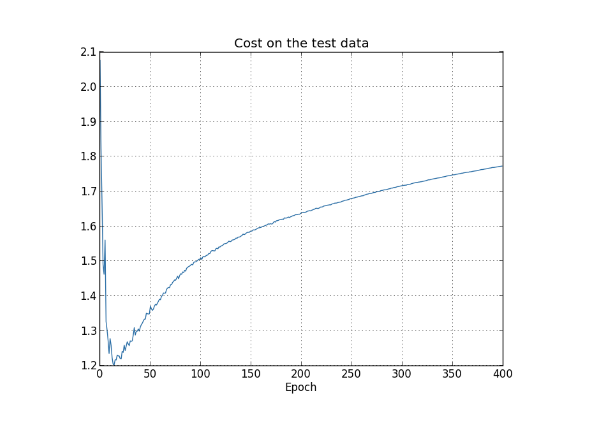

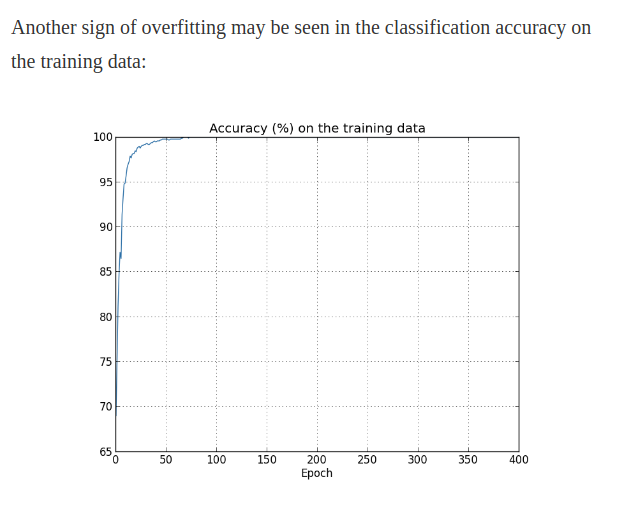

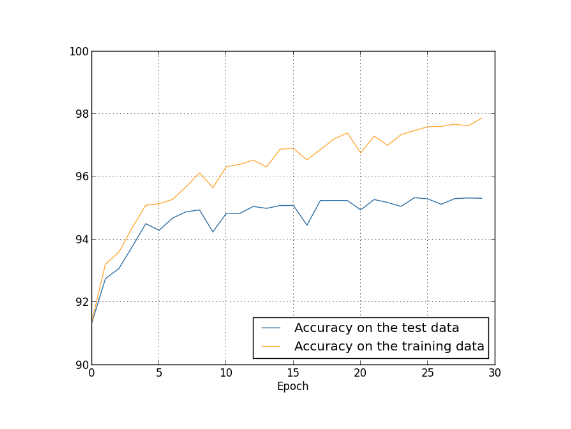

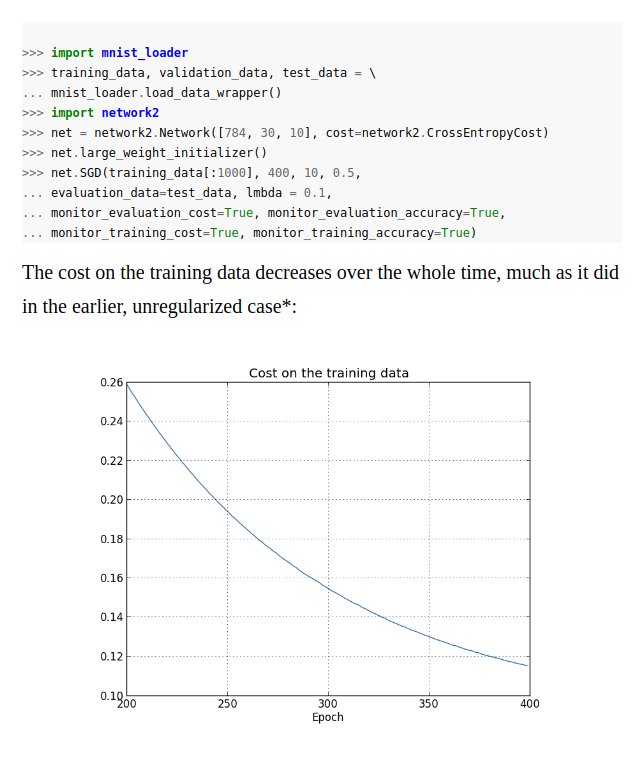

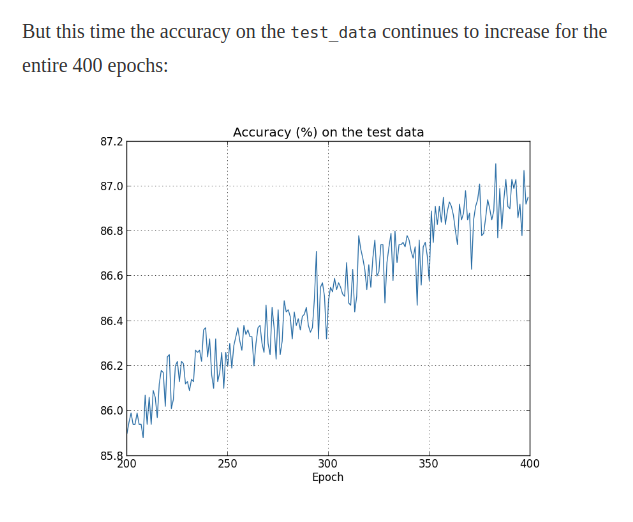

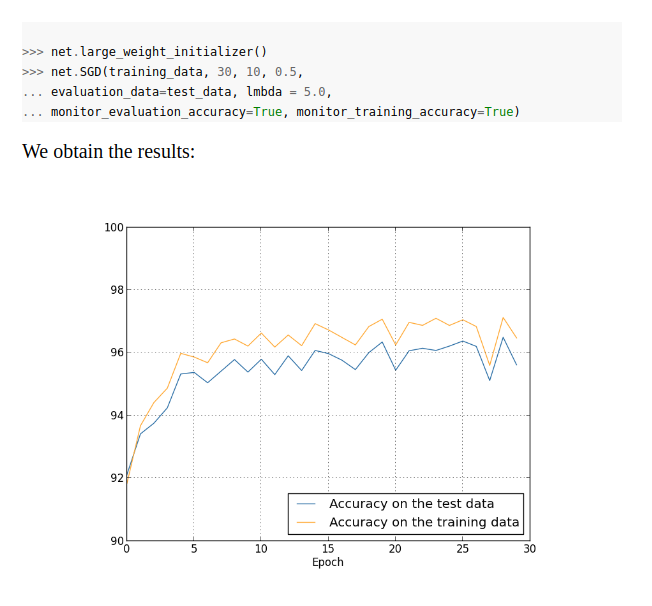

### For the Problem Set:

In [ ]:
"""network_improved 2.0.py

-----------------------

An improved version of network.py, implementing the stochastic gradient descen learning algorithm for 
a feedforward neural network. Improvements include the addiction of the cross-entropy loss function,
regularizations, and better initalization of the network weights. 

"""

#### Libraries
# Standard Library
import json
import random
import sys

# Third-party libraries
import numpy as np

#### Define the quadratic and cross-entropy cost function 
#### we will define both so that we can use both for comparision

class QuadraticCost():

    @staticmethod
    def fn(a, y):
        """Return the cost asosciated with an output ''a'' and desired output ''y''

        """

        return 0.5*np.linalg.norm(a-y)**2 #Matrix or vector norm of (a-y)**2

    @staticmethod
    def delta(z, a, y):
        """Return the error delta from the output layer."""
        return (a-y) * sigmoid_prime(z)


class CrossEntropyCost():

    @staticmethod
    def fn(a, y):
        """Return the cost associated with an output ''a'' and desired output ''y''.
        Note that np.nan_to_num is used to ensure numerical stability. In particular,
        if both ''a'' and ''y'' have a 1.0 in the same slot, then the expression 
        (1-y)*np.log(1-a) returns nan. The np.nan_to_num ensures that is converted to 
        the correct value (0.0)."""

        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))


    @staticmethod
    def delta(z, a, y):
      """Return the error delta from the output layer. Note that the parameter ''z''
      is not used by the method. It is included in the method's parameters in order to make 
      the inteface consistent with the delta method for other cost classes only."""

      return (a-y)


####Main Network class

class Network():

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list ''sizes'' contains the number of neurons in the respective layers
        of the network. For example, if the list was [2, 3, 1] then it would be a three-
        layer network, with the first layer contaiing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron. The biases and weights for the network are initalized
        randomly, using ''self.default_weight_initalizer'' (see docstring for that method)"""

          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost

      
      def default_weight_initializer(self):
          """Initalize each weight using a Gaussian distribution with mean 0 and standard
          deviation 1 over the square root of the number of weights connecting to the same 
          neuron. Initalize the biases using a Gaussian distribution with mean 0 and standard
          deviation 1.

          Note that the first layer is assumed  to be an input layer, and by convention we won't
          set any biases for those neurons, since biases are only ever used in computing the outputs 
          from later layers."""

          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x)
                          for x, y in zip(self.sizes[:-1], self.sizes[1:])]

      
      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0 and standard deviation
          1. Initalize the biases using a Gaussian distribution with mean 0 and standard deviation 1.

          Note that the first layer is assumed to be an input layer, and by convention we won't set any
          biases for those neurons, since biases are only ever used in computing the outputs from layer
          layers.

          This weight and bias initializer uses the same approach as in Chapter 1, and is included for purposes
          of comparision. It will usually be better to use the default weight initializer instead."""

          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)
                          for x, y in zip(self.sizes[:-1], self.sizes[1:])]

      def feedforward(self, a):
          """Return the output of the network if ''a'' is input."""
          for b, w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w, a) + b)
          return a

      
      def SGD(self, training_data, epochs, mini_batch_size, eta, es,
              lmbda= 0.0,
              evaluation_data = None,
              monitor_evaluation_cost = False,
              monitor_evaluation_accuracy = False,
              monitor_training_cost = False,
              monitor_training_accuracy = False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The ``training_data`` is a list of tuples ``(x, y)``
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the
          regularization parameter ``lmbda``.  The method also accepts
          ``evaluation_data``, usually either the validation or test
          data.  We can monitor the cost and accuracy on either the
          evaluation data or the training data, by setting the
          appropriate flags.  The method returns a tuple containing four
          lists: the (per-epoch) costs on the evaluation data, the
          accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data.  All values are
          evaluated at the end of each training epoch.  So, for example,
          if we train for 30 epochs, then the first element of the tuple
          will be a 30-element list containing the cost on the
          evaluation data at the end of each epoch. Note that the lists
          are empty if the corresponding flag is not set."""
         
          if evaluation_data: n_data = len(evaluation_data)
          n = len(training_data)
          evaluation_cost, evaluation_accuracy = [], []
          training_cost, training_accuracy = [], []
          #while (len(evaluation_accuracy) <= es or sum(evaluation_accuracy[-es:]) > sum(evaluation_accuracy[-es*2:-es])): #We could think about using the average classification accuracy over the last n epochs. We would then stop when the average accuracy over the last n epochs is not greater than the one over the n previous ones. This might prevent an exceptionnally good epoch early on to stop us too early.
          while (len(evaluation_accuracy) <= es or max(evaluation_accuracy[-es:]) > evaluation_accuracy[-es*2] or len(eta) > len(eta/128)): # replaced for j in range(epochs):
              eta = eta/2
              random.shuffle(training_data)  # The while statement simply loops until a condition is False. So once the last last 5 evaluation accuracies
              mini_batches = [training_data[k:k+mini_batch_size] # are no longer increasing by being larger the while loop terminates
                              for k in range(0, n, mini_batch_size)]
              for mini_batch in mini_batches:
                  self.update_mini_batch(
                      mini_batch, eta, lmbda, len(training_data))
              print("Epoch %s training complete" % len(evaluation_accuracy))
              if monitor_training_cost:
                cost = self.total_cost(training_data, lmbda)
                training_cost.append(cost)
                print("Cost on training data: {}".format(cost))
              if monitor_training_accuracy:
                accuracy = self.accuracy(training_data, convert = True)
                training_accuracy.append(accuracy)
                print("Accuracy on training data: {} / {}".format(accuracy, n))
              if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data, lmbda, convert = True)
                evaluation_cost.append(cost)
                print("Cost on evaluation data: {}".format(cost))
              if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print("Accuracy on evaluation data: {} / {}".format(
                    self.accuracy(evaluation_data), n_data))
          
              print
        
          return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy
                  

      def update_mini_batch(self, mini_batch, eta, lmbda, n):

        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta" is 
        the learning rate, ''lmdaää is the regularization parameter, and 
        ''n'' is the total size of the training data set."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y) # calculate the partial derivative of the cost with respect to the weights and biases
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-eta*(lmbda/n)*np.sign(w) - (eta / len(mini_batch)) * nw
                         for w, nw in zip(self.weights, nabla_w)]  #scale weights by weight decay
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]


      def backprop(self, x, y):
        """Return a tuple ''(nabla_b, nabla_w)'' representing the gradient for the cost
        function C_x. ''nabla_b'' and ''nabla_w'' are layer-by-layer lists of numpy arrays,
        similar to ''self.biases'' and ''self.weights''."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = (self.cost).delta(zs[-1], activations[-1], y) * sigmoid_prime(zs[-1]) # This is del(aL)/del(zL)*del(C0)/del(aL)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below refers to:
        # l = 1 means the last layer of neurons, l = 2 is the second-last
        # layer, etc etc. We use this kind of numbering so we can take 
        # advantage of the fact that Python can use negative indices in lists:
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp # gradients from ahead layer * sigmoid_prime(z) of current layer????
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)



      def accuracy(self, data, convert=False):
        """Return the number of test inputs for which the nueral network outputs the correct result.
        Note that the neural network's output is assumed to be the index of whicever neuron in the final
        layer has the highest acitvation.

        The flag ``convert`` should be set to False if the data set is
        validation or test data (the usual case), and to True if the
        data set is the training data. The need for this flag arises
        due to differences in the way the results ``y`` are
        represented in the different data sets.  In particular, it
        flags whether we need to convert between the different
        representations.  It may seem strange to use different
        representations for the different data sets.  Why not use the
        same representation for all three data sets?  It's done for
        efficiency reasons -- the program usually evaluates the cost
        on the training data and the accuracy on other data sets.
        These are different types of computations, and using different
        representations speeds things up.  More details on the
        representations can be found in
        mnist_loader.load_data_wrapper.

        """
        if convert:
            results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                      for (x, y) in data]

        else:
            results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in data]

        return sum(int(x == y) for (x, y) in results)

  



      def total_cost(self, data, lmbda, convert=False):
        """Return the total cost for the data set ``data``.  The flag
        ``convert`` should be set to False if the data set is the
        training data (the usual case), and to True if the data set is
        the validation or test data.  See comments on the similar (but
        reversed) convention for the ``accuracy`` method, above.
        """
        cost = 0.0
        for x, y in data:
            a = self.feedforward(x)
            if convert: y = vectorized_result(y)
            cost += self.cost.fn(a, y)/len(data)
        cost += 0.5*(lmbda/len(data))*sum(
            np.linalg.norm(w) for w in self.weights) #l1 regularized norm
        return cost

      def save(self, filename):
        """Save the neural network to the file ``filename``."""
        data = {"sizes": self.sizes,
                "weights": [w.tolist() for w in self.weights],
                "biases": [b.tolist() for b in self.biases],
                "cost": str(self.cost.__name__)}
        f = open(filename, "w")
        json.dump(data, f)
        f.close()

#### Loading a Network
def load(filename):
    """Load a neural network from the file ``filename``.  Returns an
    instance of Network.

    """
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net

#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position
    and zeroes elsewhere.  This is used to convert a digit (0...9)
    into a corresponding desired output from the neural network.

    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


### Misc functions

def sigmoid(z):
    """The sigmoid function"""
    return 1.0/(1.0 + np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function"""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
net = Network([784,30,10], cost=CrossEntropyCost)
net.SGD(training_data, 30,10,0.5,5,
        lmbda= 5.0,
        evaluation_data = validation_data,
        monitor_evaluation_accuracy = True,
        monitor_evaluation_cost = True,
        monitor_training_accuracy = True,
        monitor_training_cost = True)

Epoch 0 training complete
Cost on training data: 0.9513332713932615
Accuracy on training data: 44513 / 50000
Cost on evaluation data: 0.9010489567194069
Accuracy on evaluation data: 9021 / 10000
Epoch 1 training complete
Cost on training data: 0.8638034151186975
Accuracy on training data: 44887 / 50000
Cost on evaluation data: 0.8170096034503951
Accuracy on evaluation data: 9093 / 10000
Epoch 2 training complete
Cost on training data: 0.836162422469042
Accuracy on training data: 45063 / 50000
Cost on evaluation data: 0.7913347278900046
Accuracy on evaluation data: 9130 / 10000
Epoch 3 training complete
Cost on training data: 0.8286637699808113
Accuracy on training data: 45150 / 50000
Cost on evaluation data: 0.784461560910731
Accuracy on evaluation data: 9128 / 10000
Epoch 4 training complete
Cost on training data: 0.8245540526456488
Accuracy on training data: 45145 / 50000
Cost on evaluation data: 0.7810672273297062
Accuracy on evaluation data: 9132 / 10000
Epoch 5 training complete
C

IndexError: ignored